In [1]:
import numpy as np
import warnings
import matplotlib.pylab as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelBinarizer
from collections import OrderedDict
from PIL import Image
# warnings.filterwarnings('ignore')

#### 常见阶越函数：

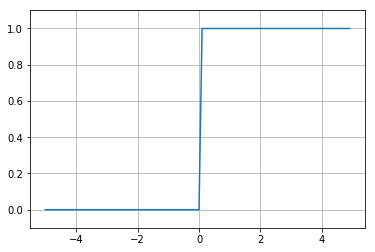

In [33]:
# 定义阶越函数
def step_func(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_func(x)
plt.plot(x,y)
# 指定y轴范围
plt.ylim(-0.1, 1.1)
plt.grid()

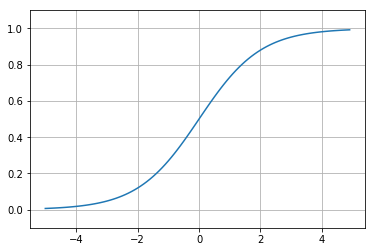

In [34]:
# Sigmoid函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.grid()

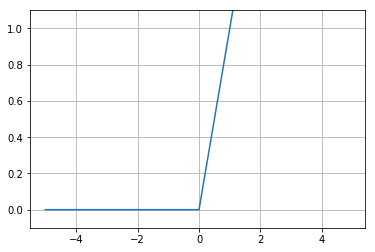

In [35]:
# 激活函数不能使用线性函数：不管有多深，总能找到与之等效的 无隐藏层的神经网络
# ReLU（Rectified Linear Unit）激活函数
def relu(x):
    return np.maximum(0,x)  # 从输入的数值中找到最大的输出
x = np.arange(-5, 5, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.grid()

#### 搭建一个可以进行推理的简单神经网络：

In [36]:
class EasyNet:
    def __init__(self):
        self.network = {}
        self.network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
        self.network['b1'] = np.array([0.1, 0.2, 0.3])
        self.network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
        self.network['b2'] = np.array([0.1, 0.2])
        self.network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
        self.network['b3'] = np.array([0.1, 0.2])
    def forward(self,x):
        W1, W2, W3 = self.network['W1'], self.network['W2'], self.network['W3']
        b1, b2, b3 = self.network['b1'], self.network['b2'], self.network['b3']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        identity_func = lambda x:x
        y = identity_func(a3)
        return y
network = EasyNet()
x = np.array([1.0,0.5])
y = network.forward(x)
print(f'推理结果：{y}')

推理结果：[0.31682708 0.69627909]


#### 用于分类任务的Softmax函数：

In [37]:
# softmax函数,粗略版本，容易溢出，导致计算错误
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

# 更新版,在原公式上分子分母同乘以一个常数结果值不变
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

#### 训练数据准备：

In [38]:
# 导入手写数字图像数据
digits = load_digits()
# 取出第一张图片和第一个标签
img = digits.data[0]
label = digits.target[0]
# 可视化图片
imgre = img.reshape(8,8)
print(imgre)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


#### 用神经网络对图片进行推理：

In [39]:
# 用神经网络进行推理
class EasyNet:
    def __init__(self):
        self.network = {}
        self.network['W1'] = np.random.rand(192).reshape(64,3)
        self.network['b1'] = np.random.rand(3)
        self.network['W2'] = np.random.rand(30).reshape(3,10)
        self.network['b2'] = np.random.rand(10)
        self.network['W3'] = np.random.rand(100).reshape(10,10)
        self.network['b3'] = np.random.rand(10)
    def forward(self,x):
        W1, W2, W3 = self.network['W1'], self.network['W2'], self.network['W3']
        b1, b2, b3 = self.network['b1'], self.network['b2'], self.network['b3']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        y = softmax(a3)
        return y
network = EasyNet()
print(img.shape)
x = np.array(img)
y = network.forward(x)
# print(f'预测值为：{np.where(y ==np.max(y))[0]}')
print(f'预测值为：{np.argmax(y)}')

(64,)
预测值为：1


In [40]:
# 均方误差
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [41]:
# 交叉熵误差
def cross_entropy_error(y,t):
    delta = 1e-7  # 用于防止log(0)
    return -np.sum(t*np.log(y+delta))

In [42]:
# mini-batch批量数据准备
digits = load_digits()
data = digits.data
target = digits.target
# 将标签转换为onehot编码
target = LabelBinarizer().fit_transform(target)
# 抽取其中10组
train_size = len(data)
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
rand_x_batch = data[batch_mask]
rand_t_batch = target[batch_mask]
target

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [43]:
# mini-batch 版交叉熵误差,one_hot版
def cross_entropy_error(y, t):
    if y.ndim==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y + 1e-7))/batch_size

# mini-batch 版交叉熵误差,非one_hot版
def cross_entropy_error_no(y, t):
    if y.nidm==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

In [44]:
# Numerical Differentiation 数值微分
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h)-f(x-h))/2*h

In [45]:
# 梯度计算
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)  # 生成和x形状相同的数值
    for idx in range(x.size):
        temp_val = x[idx]
        # f(x+h)
        x[idx] = temp_val + h
        fxh1 = f(x)
        # f(x-h)
        x[idx] = temp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = temp_val
    return grad

def function_2(x):
    return np.sum(x**2)
# 计算 函数 y = x1**2 + x2**2的梯度
numerical_gradient(function_2, np.array([3.0,4.0]))

array([6., 8.])

In [46]:
# 实现梯度下降算法
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    return x

gradient_descent(function_2, init_x=np.array([-3.0,4.0]),lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

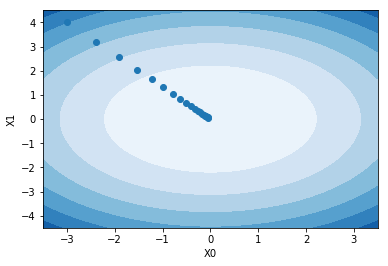

In [47]:
# 可视化此过程
def gradient_descentest(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)
# 计算x,y坐标等高线对应的高度值
def f(x, y):
    return x**2 + y**2
init_x = np.array([-3.0, 4.0])    
lr = 0.1
step_num = 20
x, x_history = gradient_descentest(function_2, init_x, lr=lr, step_num=step_num)
# 可大概看出最优解为（0,0）
plt.plot(x_history[:,0], x_history[:,1], 'o')
plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
# 生成x,y的数据, n越多，图像越细腻
n = 256
x = np.linspace(-3.5, 3.5, n)
y = np.linspace(-5, 5, n)
# 把x,y数据生成mesh网格状的数据，因为等高线的显示是在网格的基础上添加上高度值
X, Y = np.meshgrid(x, y)
# 填充等高线
plt.contourf(X, Y, f(X, Y),cmap=plt.cm.Blues)
print('',end='')

In [48]:
# 使用梯度下降算法的神经网络
class SimpleNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std*np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)
    def predict(self,x):
        W1,W2 = self.params['W1'],self.params['W2']
        b1,b2 = self.params['b1'],self.params['b2']
        a1 = np.dot(x,W1)+b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2)
        return y
    def loss(self,x,t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        acc = np.sum(y==t)/float(x.shape[0])
        return acc
    def numerical_gradient(self, x, t):
        loss_W = lambda W:self.loss(x,t)
        grads = {}
        grads['W1'] = self.numerical_gradient_mini(loss_W, self.params['W1'])
        grads['b1'] = self.numerical_gradient_mini(loss_W, self.params['b1'])
        grads['W2'] = self.numerical_gradient_mini(loss_W, self.params['W2'])
        grads['b2'] = self.numerical_gradient_mini(loss_W, self.params['b2'])
        return grads
    # 适用于mini-batch的梯度算法
    def numerical_gradient_mini(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            x[idx] = tmp_val # 还原值
            it.iternext()   
        return grad
net = SimpleNet(input_size=64, hidden_size=100, output_size=10)
print(f"W1:{net.params['W1'].shape},b1:{net.params['b1'].shape},W2:{net.params['W2'].shape},b2:{net.params['b2'].shape}")
x = np.random.rand(100,64)
net.predict(x)[:2]

W1:(64, 100),b1:(100,),W2:(100, 10),b2:(10,)


array([[0.00094114, 0.00100813, 0.00095407, 0.00104266, 0.00099823,
        0.00103493, 0.0009777 , 0.00102246, 0.00099475, 0.00102843],
       [0.00094155, 0.00100752, 0.00095425, 0.00104257, 0.00099682,
        0.00103417, 0.00097754, 0.00102319, 0.00099492, 0.00102708]])

In [49]:
%%time
# 开始学习
# 超参数
iters_num = 500
train_size = data.shape[0]
batch_size = 10
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
network = SimpleNet(input_size=64, hidden_size=100, output_size=10)
for i in range(iters_num):
    # 获取mini-batch
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = data[batch_mask]
    t_batch = target[batch_mask]
    # 计算梯度
    grad = network.numerical_gradient(x_batch,t_batch)
    # 更新梯度
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key]
    # 记录学习过程
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    if i % 10 == 0:
        train_acc = network.accuracy(data, target)
        train_acc_list.append(train_acc)

Wall time: 7min 27s


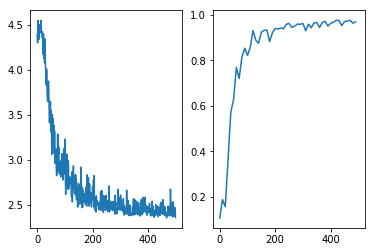

In [50]:
# 显示误差和准确度，训练太慢所以训练次数不多，所以误差较大
f,(ax11,ax12) = plt.subplots(1,2,sharex=True)
ax11.plot([x for x in range(500)],train_loss_list)
ax12.plot([x for x in range(0,500,10)],train_acc_list)
print('',end='')

In [51]:
# 误差反向传播法
# 乘法层
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x*y
        return out
    def backward(self, dout):
        dx = dout*self.y
        dy = dout*self.x
        return dx,dy

In [52]:
# 示例
apple = 100
apple_num = 2
tax = 1.1
# layer
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()
# forward
apple_price = mul_apple_layer.forward(apple,apple_num)
price = mul_tax_layer.forward(apple_price,tax)
# backward
dprice = 1
dapple_price,dtax = mul_tax_layer.backward(dprice)
dapple,dapple_num = mul_apple_layer.backward(dapple_price)
print(f'price:{price},{dapple},{dapple_num},{dtax}')

price:220.00000000000003,2.2,110.00000000000001,200


In [53]:
# 加法层
class AddLayer:
    def __init__(self):
        pass
    def forward(self,x,y):
        out = x + y
        return out
    def backward(self,dout):
        dx = dout*1
        dy = dout*1
        return dx,dy

#### 实现如下的计算
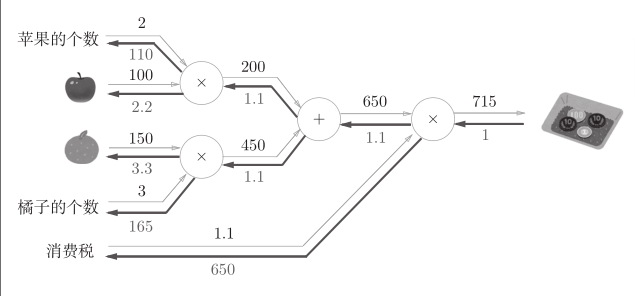

In [54]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1
# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()
# forward
apple_price = mul_apple_layer.forward(apple,apple_num)
orange_price = mul_orange_layer.forward(orange,orange_num)
all_price = add_apple_orange_layer.forward(apple_price,orange_price)
price = mul_tax_layer.forward(all_price,tax)
# backward
dprice = 1
dall_price,dtax = mul_tax_layer.backward(dprice)
dapple_price,dorange_price = add_apple_orange_layer.backward(dall_price)
dorange,dorange_num = mul_orange_layer.backward(dorange_price)
dapple,dapple_num = mul_apple_layer.backward(dapple_price)
print(f'Price:{price},\n{dapple_num},{dapple},{dorange},{dorange_num},{dtax}')

Price:715.0000000000001,
110.00000000000001,2.2,3.3000000000000003,165.0,650


In [55]:
# 激活层函数
# ReLU激活函数
class Relu:
    def __init__(self):
        self.mask = None
    def forward(self,x):
#         print(x)
        self.mask = (x<=0)
        out = x.copy()
        out[self.mask] = 0
        return out
    def backward(self,dout):
        dout[self.mask] = 0
        dx = dout
        return dx

In [56]:
# Sigmoid激活函数
class Sigmoid:
    def __init__(self):
        self.out = None
    def forward(self,x):
        out = 1/(1 + np.exp(-x))
        self.out = out
        return out
    def backward(self,dout):
        dx = dout*(1.0 - self.out)*self.out
        return dx

In [57]:
# 仿射变换 Affine层
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    def forward(self, x):
        self.x = x
        out = np.dot(x,self.W) + self.b
        return out
    def backward(self, dout):
        dx = np.dot(dout,self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout,axis=0)
        return dx

In [58]:
# Softmax-with-Loss
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None 
        self.y = None
        self.t = None
    def forward(self,x,t):
        self.t = t
        self.y = self.softmax(x)
        self.loss = self.cross_entropy_error(self.y,self.t)
        return self.loss
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y -self.t)/batch_size
        return dx
    def cross_entropy_error(self, y, t):
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)
        # 监督数据是one-hot-vector的情况下，转换为正确解标签的索引
        if t.size == y.size:
            t = t.argmax(axis=1)
        batch_size = y.shape[0]
        return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
    def softmax(self, x):
        # 适用于多批量数据的softmax
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T
        x = x - np.max(x) # 溢出对策
        return np.exp(x) / np.sum(np.exp(x))

#### Softmax-with-Loss层计算图
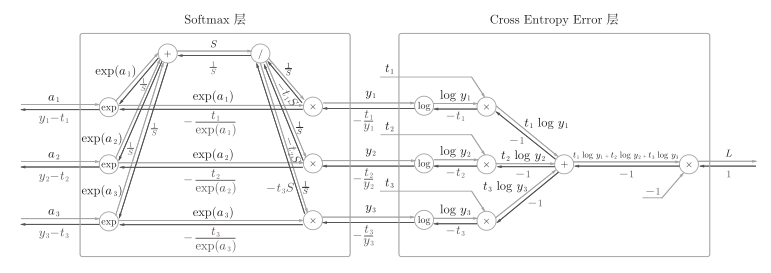

In [59]:
# 误差反向传播的两层网络
class SimpleNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std*np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)
        # 生成层
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'],
                                        self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'],
                                        self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self,x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    def loss(self,x,t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : 
            t = np.argmax(t, axis=1)
        acc = np.sum(y==t)/float(x.shape[0])
        return acc
    def numerical_gradient(self, x, t):
        loss_W = lambda W:self.loss(x,t)
        grads = {}
        grads['W1'] = self.numerical_gradient_mini(loss_W, self.params['W1'])
        grads['b1'] = self.numerical_gradient_mini(loss_W, self.params['b1'])
        grads['W2'] = self.numerical_gradient_mini(loss_W, self.params['W2'])
        grads['b2'] = self.numerical_gradient_mini(loss_W, self.params['b2'])
        return grads
    # 适用于mini-batch的梯度算法
    def numerical_gradient_mini(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            x[idx] = tmp_val # 还原值
            it.iternext()   
        return grad
    # 反向传播的梯度算法
    def gradient(self,x,t):
        # forward
        self.loss(x,t)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        # 获取当前网络的最新反向传播数据
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        return grads

In [60]:
# 梯度确认，通过对比误差反向传播的结果和数组微分的结果检查是否正确
network = SimpleNet(input_size=64,hidden_size=50,output_size=10)
x_batch = data[:3]
t_batch = target[:3]
grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)
# 求格个权重的误差平均值
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key]-grad_numerical[key]))
    print(f'{key}:{diff}')

W1:1.3660444129169342e-08
b1:2.1469486127323816e-09
W2:3.773204145531353e-08
b2:1.41890160532121e-07


In [63]:
%%time
# 开始训练
network = SimpleNet(input_size=64,hidden_size=50,output_size=10)
iters_num = 1000
train_size = data.shape[0]
batch_size = 100
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = data[batch_mask]
    t_batch = target[batch_mask]
    # 通过误差反向传播求梯度
    grad = network.gradient(x_batch,t_batch) 
    # 更新权重
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key]
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    if i % 10 == 0:
        train_acc = network.accuracy(data,target)
        train_acc_list.append(train_acc)

Wall time: 983 ms


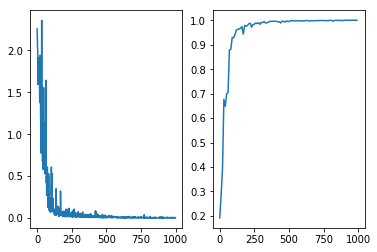

In [64]:
# 显示训练误差和精确度
f,(ax11,ax12) = plt.subplots(1,2,sharex=True)
ax11.plot([x for x in range(1000)],train_loss_list)
ax12.plot([x for x in range(0,1000,10)],train_acc_list)
print('',end='')